In [1]:
from from_coords import *

In [2]:
config_path = 'weights/inria_config.json'
model_weight_path = 'weights/inria_weights.pth'
bounding_box = [[46.517912578729074, 6.560691102288617], [46.5161576863163, 6.563115234250399]]
parcel_polygon = [[46.51656344681835, 6.560728158801604], [46.517934700120776, 6.561210771709841], \
            [46.5179253876136, 6.5622765043554905], [46.51794845035286, 6.563045957013022], \
                  [46.51681718786281, 6.562760313143832], [46.51634223819382, 6.561474667412574]]
mapbox_api_key = 'pk.eyJ1Ijoic3RhbmR1YyIsImEiOiJja21vbXdrOXUwNmE0MnFvOXVuanowMGl0In0.gvmSBOYLGavx8nhgAYTO5Q'
image, buildings, dists, nb_comp, parcelle_coords_xy = segment_buildings(config_path, model_weight_path, \
                                                                 bounding_box, mapbox_api_key, parcel_polygon)

<Figure size 1440x1440 with 0 Axes>

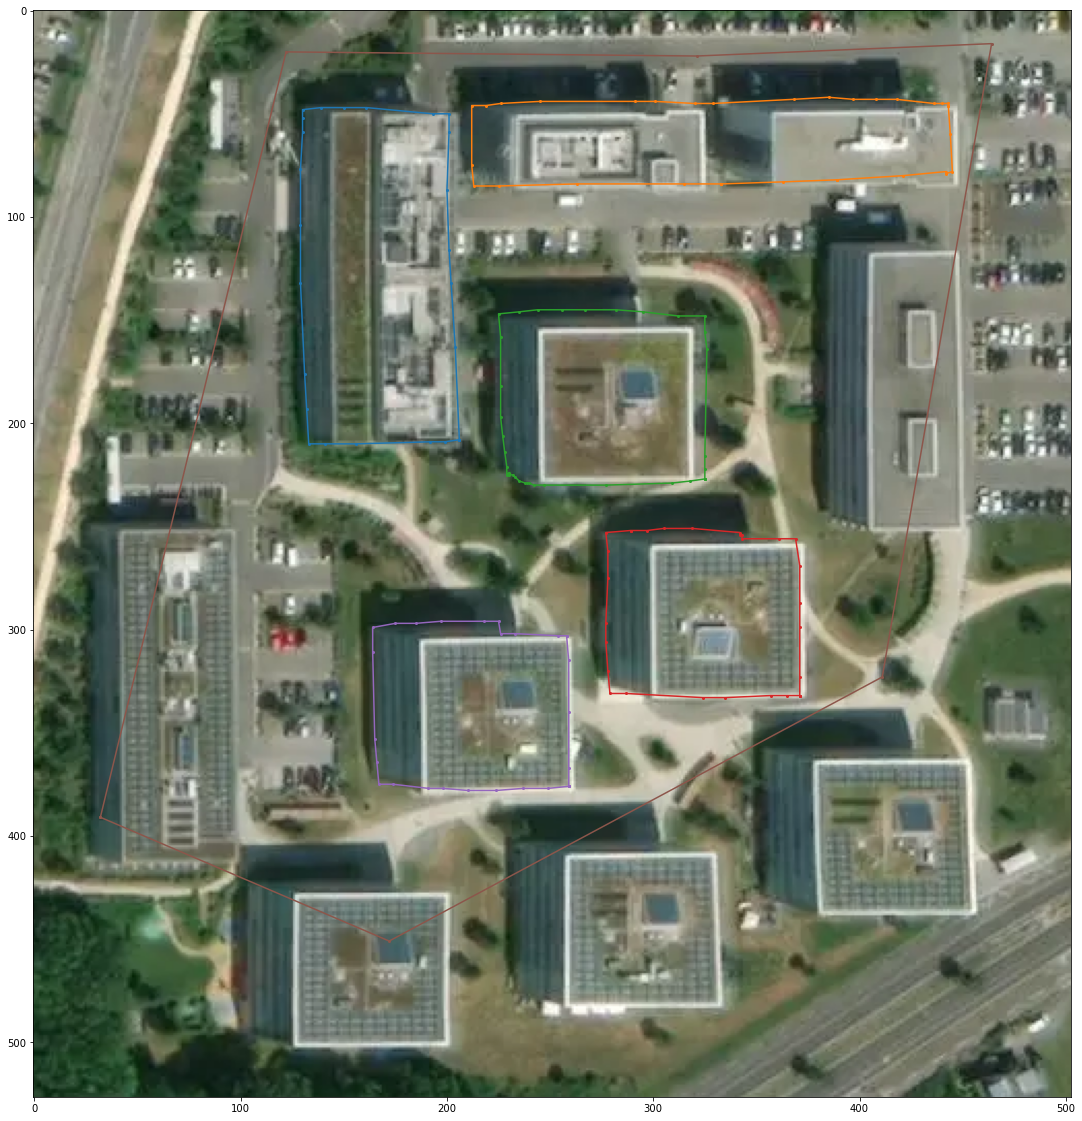

In [3]:
plt.figure(figsize=(20,20))
load_image = io.BytesIO(image)
im = np.load(load_image, allow_pickle=True)
plt.figure(figsize=(20,20))
plt.imshow(im);
for building in buildings:
    contour = np.array(building['xy'])
    if building['area'] > 0.0:
        plt.plot(*(contour[:,0], contour[:,1]), '-o', markersize=2);
parcelle_coords_xy = np.array(parcelle_coords_xy)
plt.plot(*(parcelle_coords_xy[:,0], parcelle_coords_xy[:,1]), '-o', markersize=2);

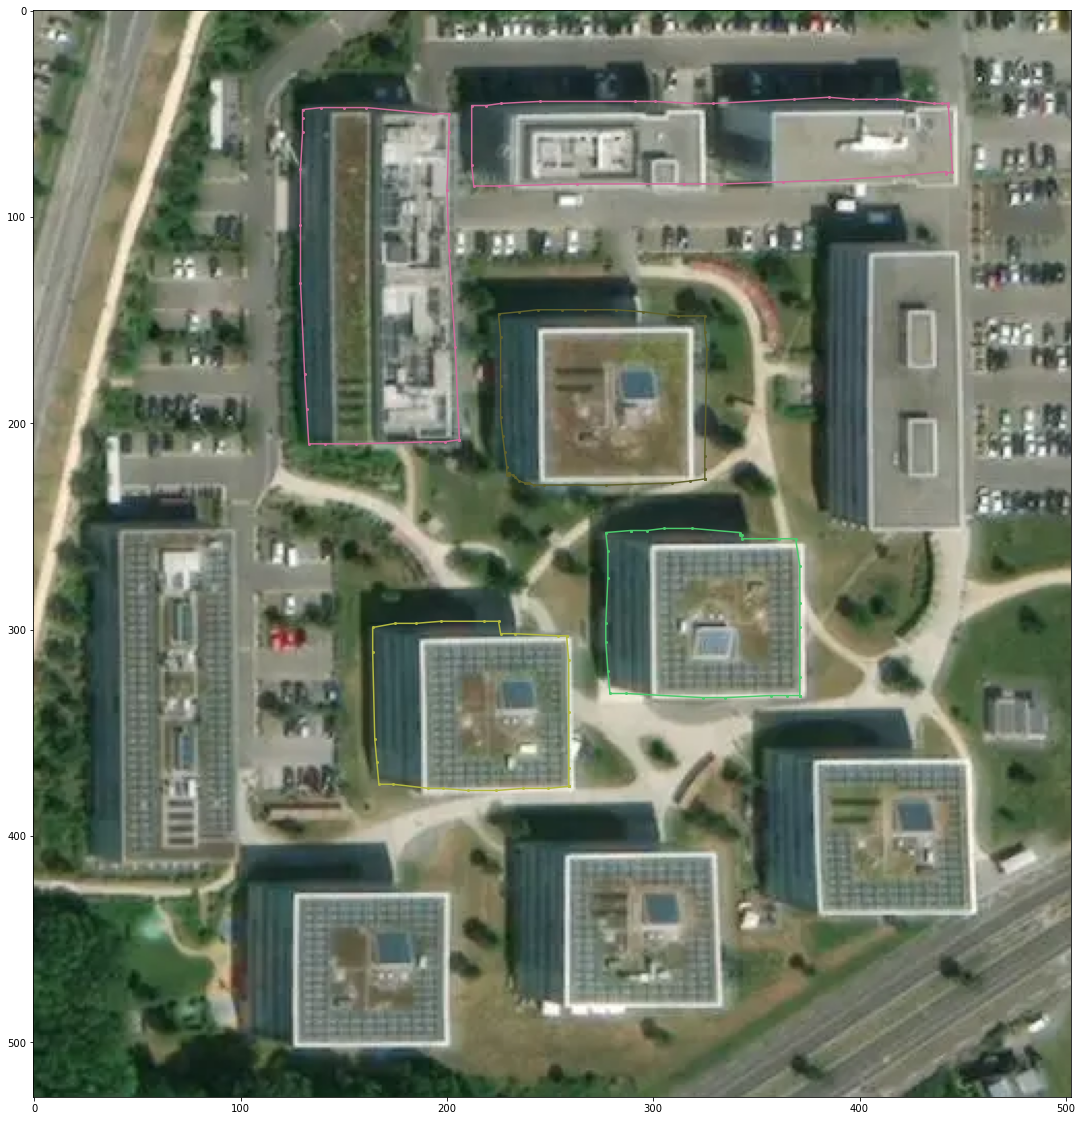

In [4]:
colors = np.random.rand(nb_comp, 3)
plt.figure(figsize=(20,20))
plt.imshow(im)
for building in buildings:
    contour = np.array(building['xy'])
    plt.plot(*(contour[:,0], contour[:,1]), '-o', markersize=2, c=colors[building['comp'],:]);

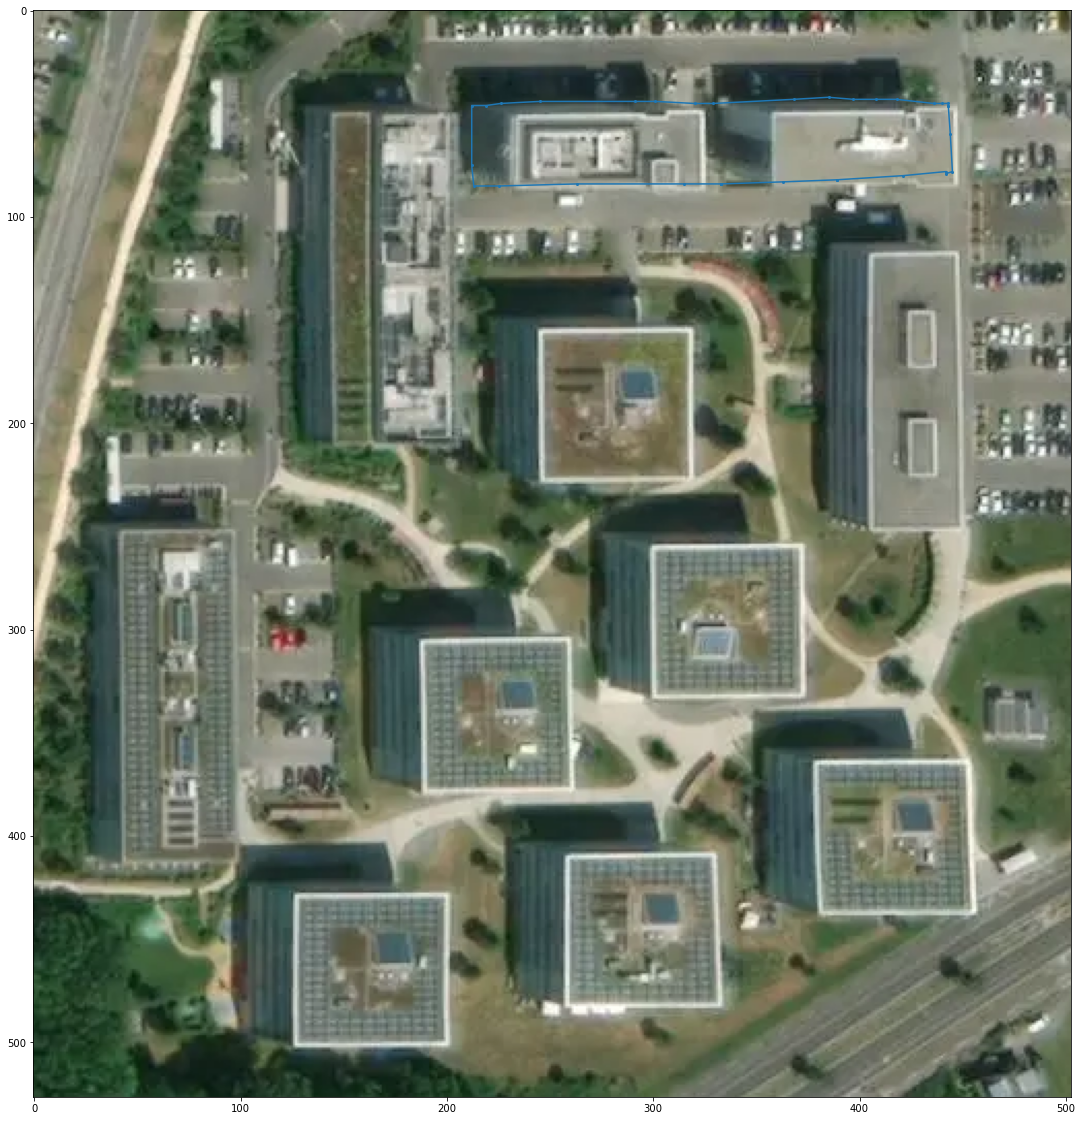

In [5]:
plt.figure(figsize=(20,20))
plt.imshow(im)
contour = np.array(buildings[1]['xy'])
plt.plot(*(contour[:,0], contour[:,1]), '-o', markersize=2);

In [6]:
buildings[1]

{'xy': [(333, 84),
  (333, 84),
  (363, 83),
  (389, 82),
  (389, 82),
  (421, 80),
  (442, 78),
  (442, 79),
  (445, 78),
  (444, 60),
  (443, 46),
  (443, 46),
  (443, 45),
  (440, 45),
  (436, 45),
  (418, 43),
  (408, 43),
  (397, 43),
  (385, 42),
  (368, 43),
  (329, 45),
  (320, 45),
  (301, 44),
  (291, 44),
  (245, 44),
  (226, 45),
  (219, 46),
  (212, 46),
  (212, 75),
  (213, 85),
  (225, 85),
  (263, 84),
  (315, 84),
  (333, 84),
  (333, 84)],
 'lat_long': [(46.51769808854037, 6.56234085559845),
  (46.51769808854037, 6.56234085559845),
  (46.51770177998727, 6.562501788139343),
  (46.51770547143417, 6.562641263008118),
  (46.51770547143417, 6.562641263008118),
  (46.51771285432796, 6.562812924385071),
  (46.51772023722176, 6.562925577163696),
  (46.51771654577486, 6.562925577163696),
  (46.51772023722176, 6.562941670417786),
  (46.5177866832659, 6.562936305999756),
  (46.51783836352246, 6.562930941581726),
  (46.51783836352246, 6.562930941581726),
  (46.51784205496936, 6.5

In [7]:
dists

array([[ 0.        ,  4.51517184,  8.20940334, 34.50395138, 35.71090454],
       [ 4.51517184,  0.        , 24.62829034, 68.54903016, 86.60932883],
       [ 8.20940334, 24.62829034,  0.        ,  9.03041116, 27.93919335],
       [34.50395138, 68.54903016,  9.03041116,  0.        ,  7.388463  ],
       [35.71090454, 86.60932883, 27.93919335,  7.388463  ,  0.        ]])